In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif

#### Load and seprate data

In [2]:
# load breast_cancer data set
data = load_breast_cancer()

# seprate data to feature and target
x = data.data
y = data.target

#### Now lets calculate information gain for each feature

In [3]:
info_gain = mutual_info_classif(x, y)

In [4]:
info_gain

array([0.3671256 , 0.10012911, 0.40393918, 0.36063328, 0.08368235,
       0.21284917, 0.37244002, 0.44057815, 0.07108468, 0.00999675,
       0.2505056 , 0.00083028, 0.27443884, 0.3404008 , 0.01546635,
       0.07521434, 0.11628649, 0.12774112, 0.01230914, 0.03979048,
       0.45690049, 0.11874074, 0.47787493, 0.46433913, 0.09973322,
       0.22610071, 0.31503534, 0.43579389, 0.09233318, 0.06719404])

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# create a dictionary to store the feature and its information gain

info_gain_dict = {}
for i in range(len(data.feature_names)):
    info_gain_dict[data.feature_names[i]] = info_gain[i]

In [7]:
info_gain_dict

{'mean radius': 0.3671255989781148,
 'mean texture': 0.10012911070115815,
 'mean perimeter': 0.4039391757068891,
 'mean area': 0.36063327783179755,
 'mean smoothness': 0.08368234856972356,
 'mean compactness': 0.21284917214318821,
 'mean concavity': 0.37244001856300213,
 'mean concave points': 0.44057814915448423,
 'mean symmetry': 0.07108467869020618,
 'mean fractal dimension': 0.009996745897588921,
 'radius error': 0.2505055994349017,
 'texture error': 0.0008302844550343025,
 'perimeter error': 0.27443884138741215,
 'area error': 0.3404008003994963,
 'smoothness error': 0.015466347221875898,
 'compactness error': 0.07521434019313955,
 'concavity error': 0.11628648614534431,
 'concave points error': 0.12774112060650888,
 'symmetry error': 0.012309139856754525,
 'fractal dimension error': 0.03979047519416823,
 'worst radius': 0.45690048646816095,
 'worst texture': 0.11874074317817906,
 'worst perimeter': 0.4778749327045342,
 'worst area': 0.46433913076290034,
 'worst smoothness': 0.099

In [8]:
# sort the dictionary by the informmation gain in descending order
ig_dict_sorted = dict(sorted(info_gain_dict.items(), key=lambda item: item[1], reverse=True))

# select the top n feature with highest information gain
n= 5 
selected_features = list(ig_dict_sorted.keys())[:n]

# print the selected features
print('selected features: ')
print(selected_features)

selected features: 
['worst perimeter', 'worst area', 'worst radius', 'mean concave points', 'worst concave points']


C:\Users\ar326\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


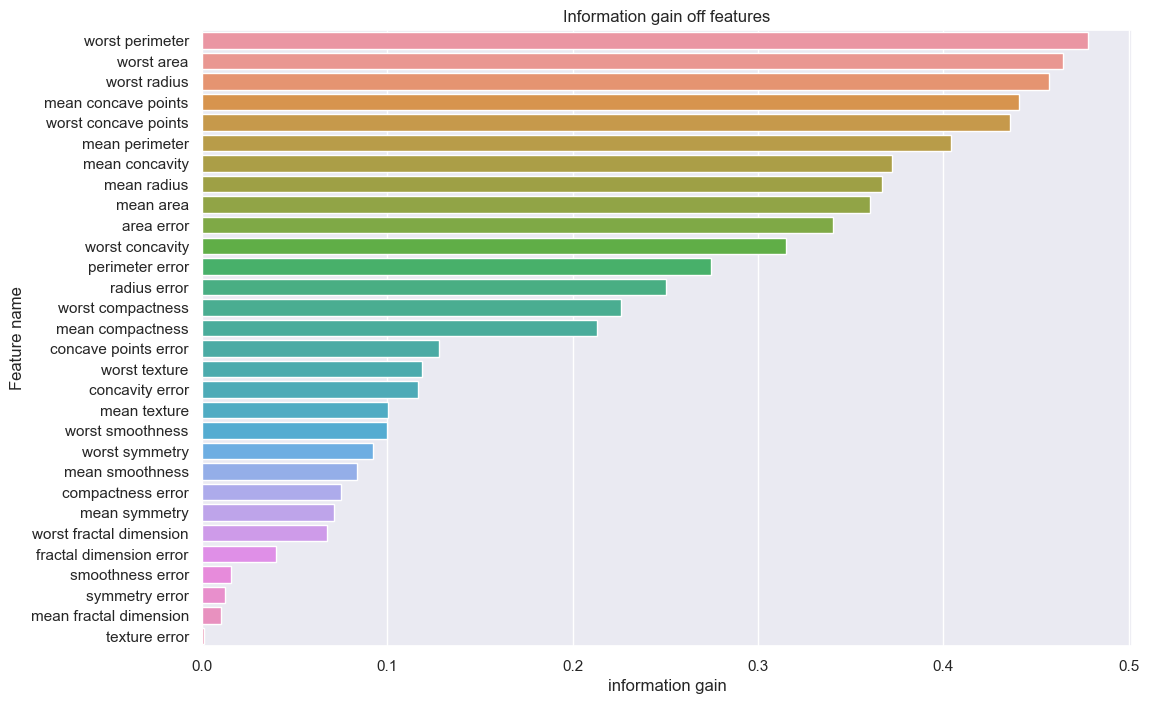

In [9]:
# Visualize the information gain of each feature

sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(12, 8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title("Information gain off features")
plt.xlabel("information gain")
plt.ylabel("Feature name")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [13]:
selected_features = []

model = RandomForestClassifier()

num_features_to_select = 5

while len(selected_features) < num_features_to_select:
    best_score = -1  # as initial value so the first calculated mean score will always greater than best score then its update
    best_feature = None
    for feature_idx in range(x.shape[1]):       # ---------------> feature_idx = 0, 1, ......, 29
        if feature_idx in selected_features:
            continue
            
        # try adding the feature to the selected set
        candidate_features = selected_features + [feature_idx]
        
        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, x[:, candidate_features], y, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        
        # keep track of the best-performing feature
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature_idx
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature {len(selected_features)} : {best_feature}, Mean Accuracy : {best_score:.4f}")
            
print("Selected Feature indices: ", selected_features)

Selected Feature 1 : 27, Mean Accuracy : 0.8857
Selected Feature 2 : 20, Mean Accuracy : 0.9367
Selected Feature 3 : 1, Mean Accuracy : 0.9613
Selected Feature 4 : 29, Mean Accuracy : 0.9666
Selected Feature 5 : 2, Mean Accuracy : 0.9666
Selected Feature indices:  [27, 20, 1, 29, 2]


In [14]:
selected_features

[27, 20, 1, 29, 2]

In [20]:
indxes = [27, 20, 1, 29, 2]
for i in indxes:
    print(data.feature_names[i])

worst concave points
worst radius
mean texture
worst fractal dimension
mean perimeter
